In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_file_path = 'C:/Users/U/Documents/4.Semester/Masterarbeit/concept_implementation/data/can_data_23112023.db'
conn = sqlite3.connect(db_file_path)
query = "SELECT * FROM CANData"
df = pd.read_sql_query(query, conn)
conn.close()

In [11]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.sort_values(by='timestamp')
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,DrBack_Press,Supply_Press,Oil_Temp,Cool_Temp,Steering_Angle,Amb_Temp,FuelPressure,Cab_Angle,Drive_Dir,timestamp,...,Engine_Load,Bat_Volt,Oil_Press,Speed,FrameFB_Angle,FrameLR_Angle,RPM_DriveMot,WorkPump_Q,RPM_Diesel,datetime
131526,0.0,0.0,13.0,15.0,2.0,0.0,0.0,2.0,0.0,1.700724e+09,...,0.0,244.0,0.0,0.0,0.0,0.5,0.0,143.2,0.0,2023-11-23 07:15:57.320000000
131527,0.0,0.0,13.0,15.0,2.0,0.0,0.0,1.9,0.0,1.700724e+09,...,0.0,244.0,0.0,0.0,0.0,0.5,0.0,143.2,0.0,2023-11-23 07:15:57.329999872
131528,0.0,0.0,13.0,15.0,2.0,0.0,0.0,1.9,0.0,1.700724e+09,...,0.0,244.0,0.0,0.0,0.0,0.5,0.0,143.2,0.0,2023-11-23 07:15:57.340000000
131529,0.0,0.0,13.0,15.0,2.0,0.0,0.0,1.9,0.0,1.700724e+09,...,0.0,244.0,0.0,0.0,0.0,0.5,0.0,143.2,0.0,2023-11-23 07:15:57.349999872
131530,0.0,0.0,13.0,15.0,2.0,0.0,0.0,1.9,0.0,1.700724e+09,...,0.0,244.0,0.0,0.0,0.0,0.5,0.0,143.2,0.0,2023-11-23 07:15:57.360000000


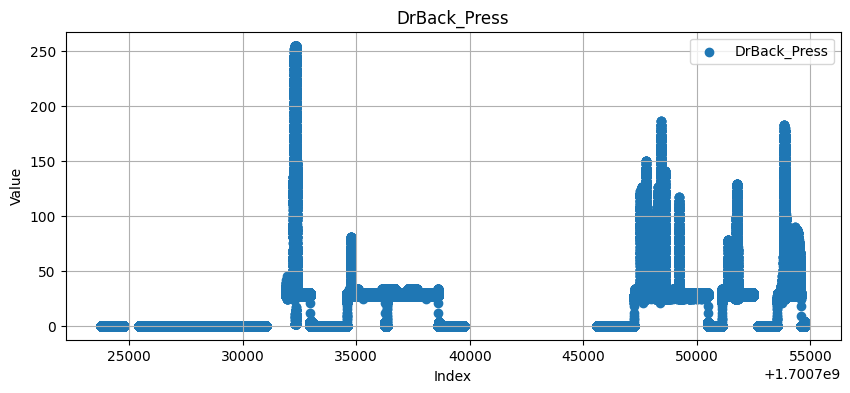

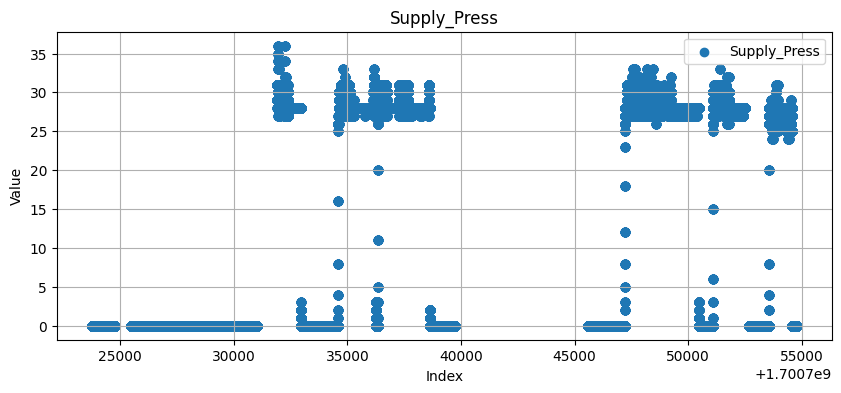

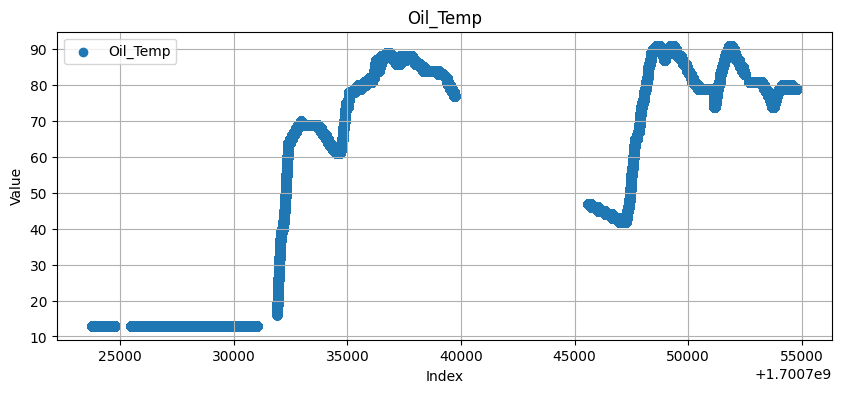

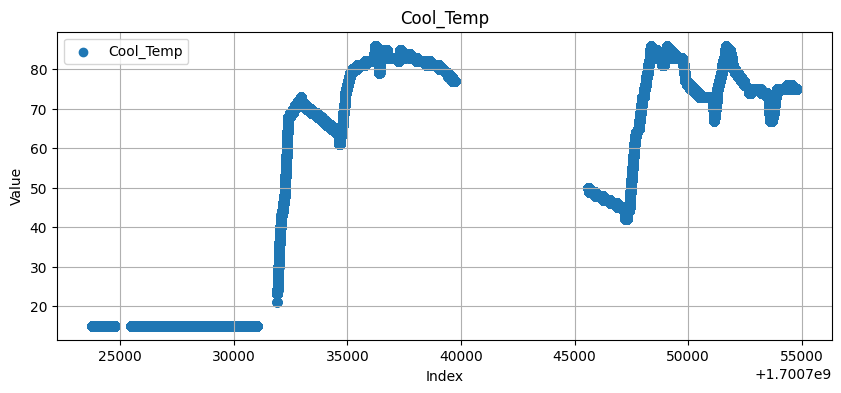

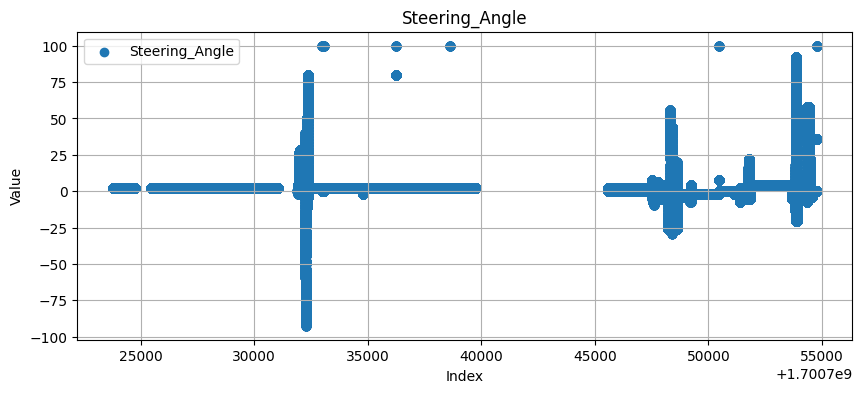

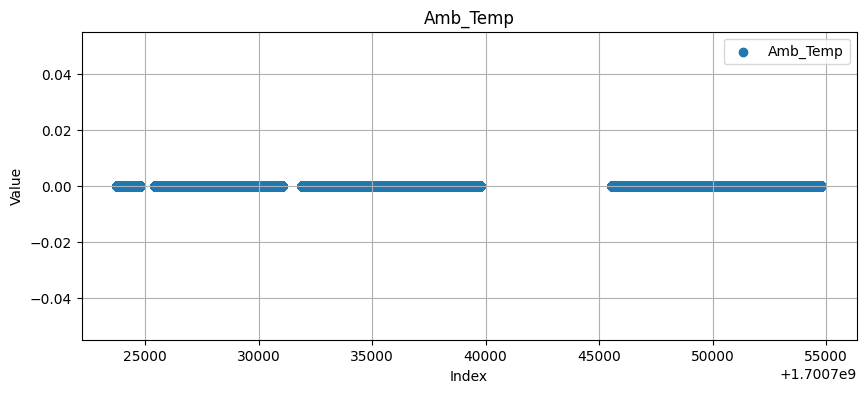

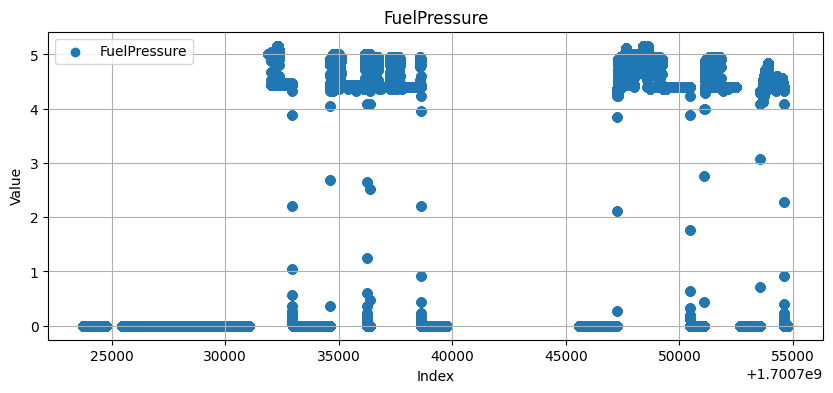

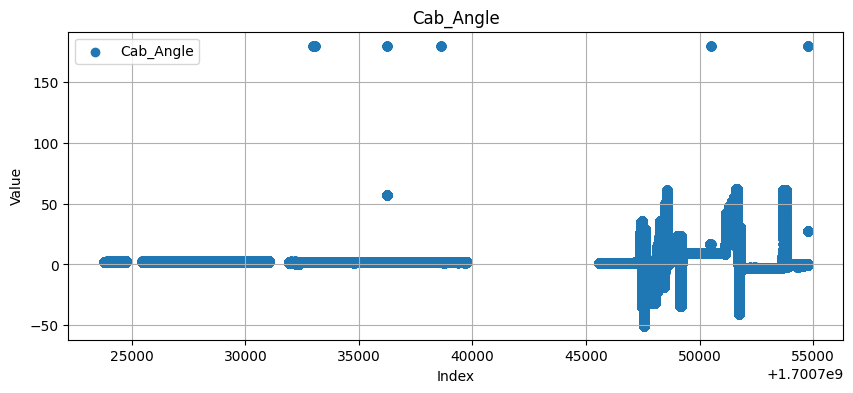

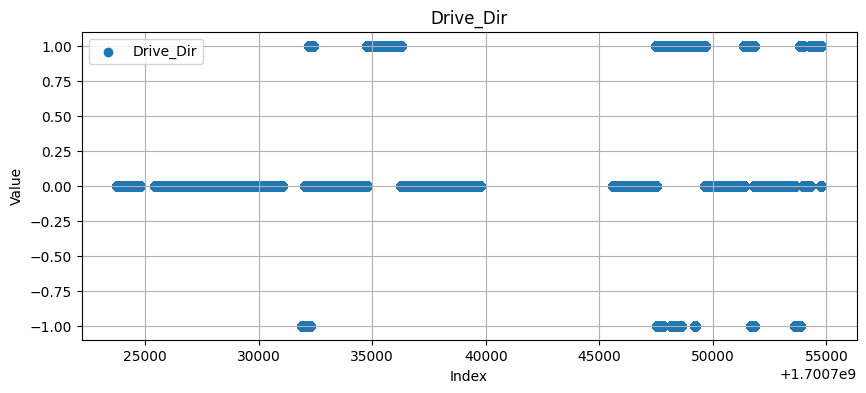

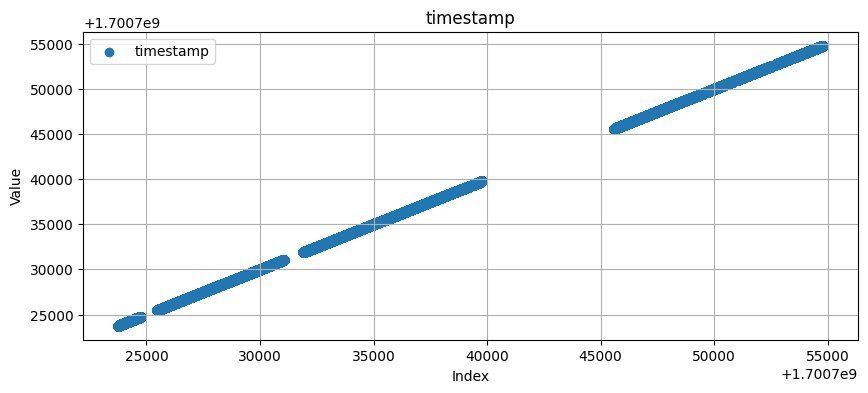

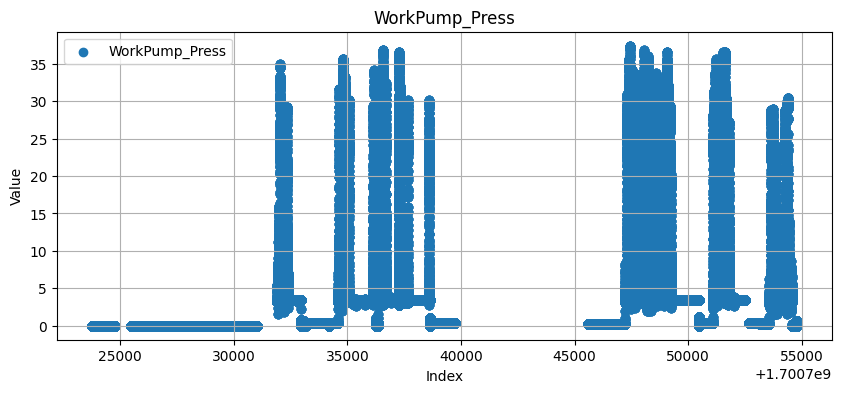

Skipping file


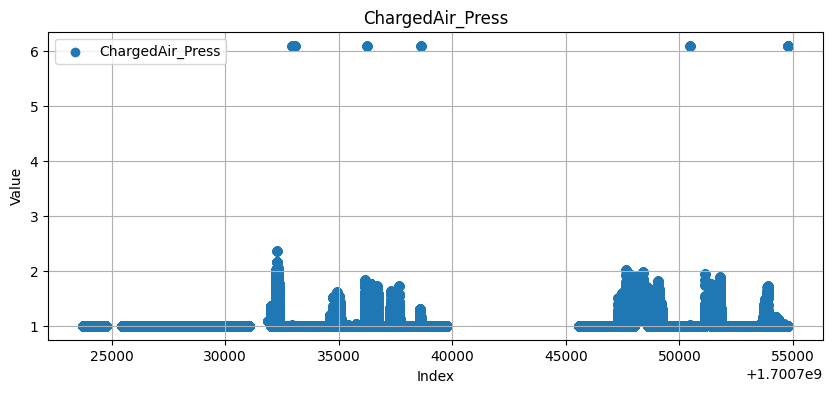

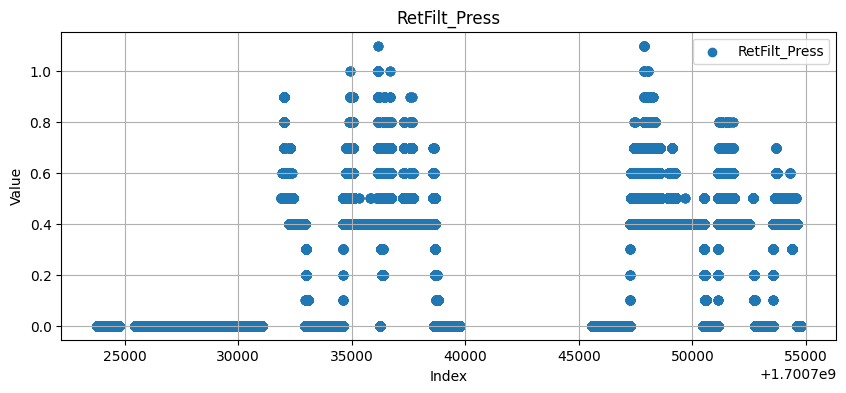

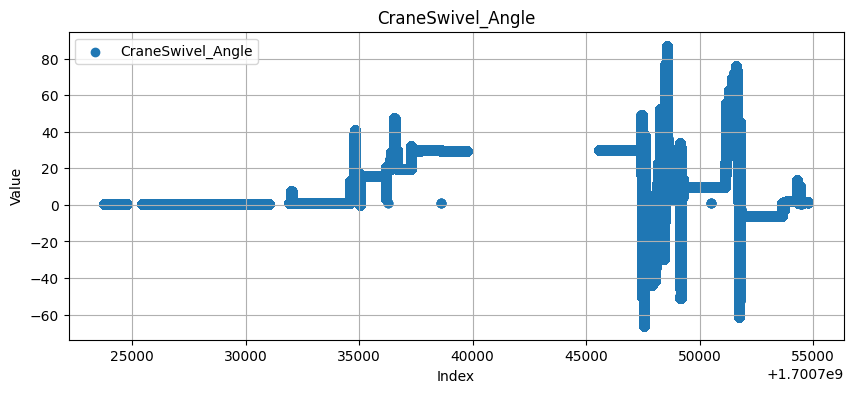

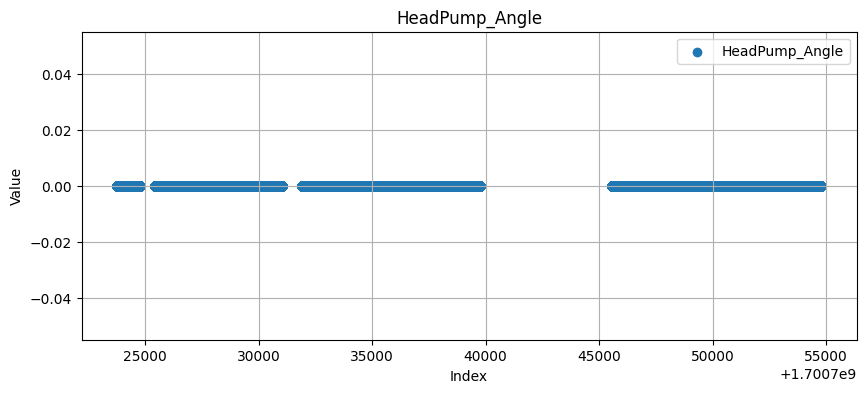

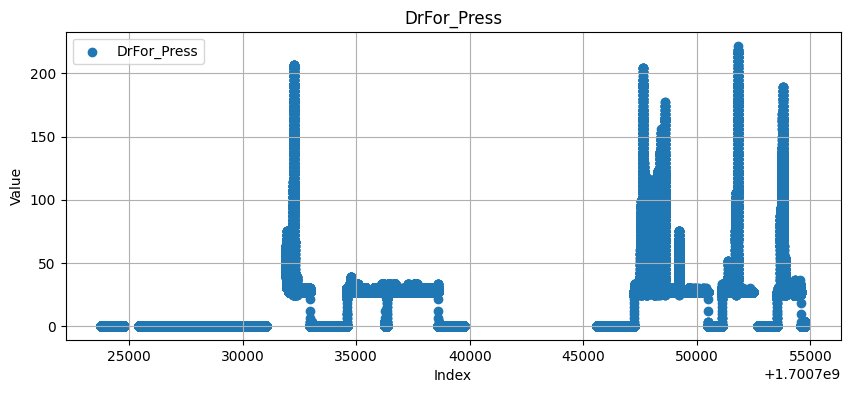

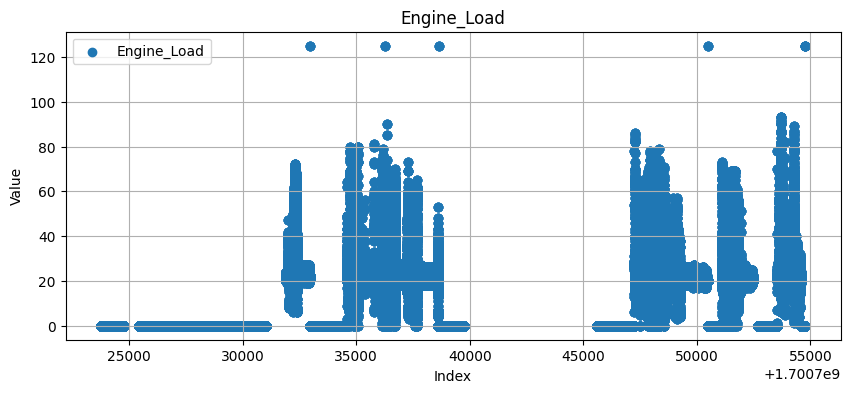

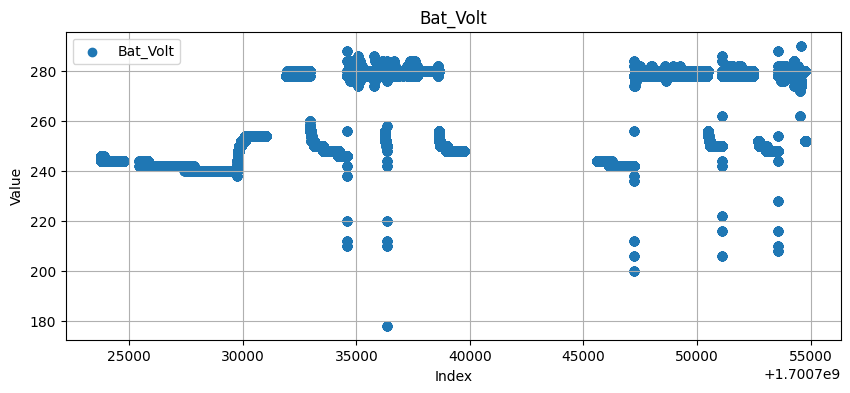

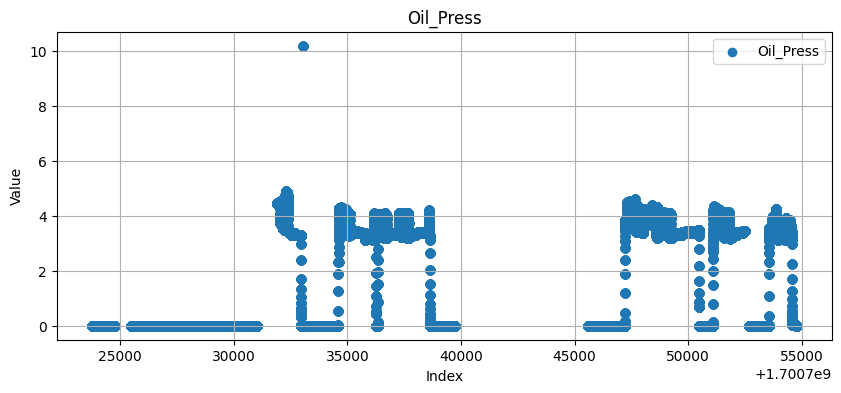

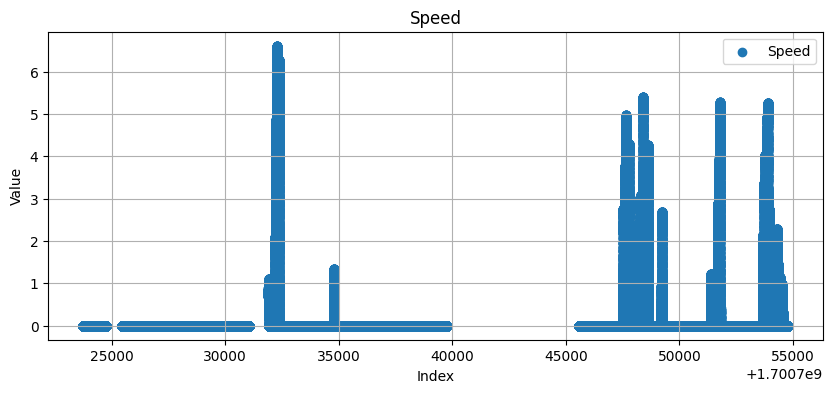

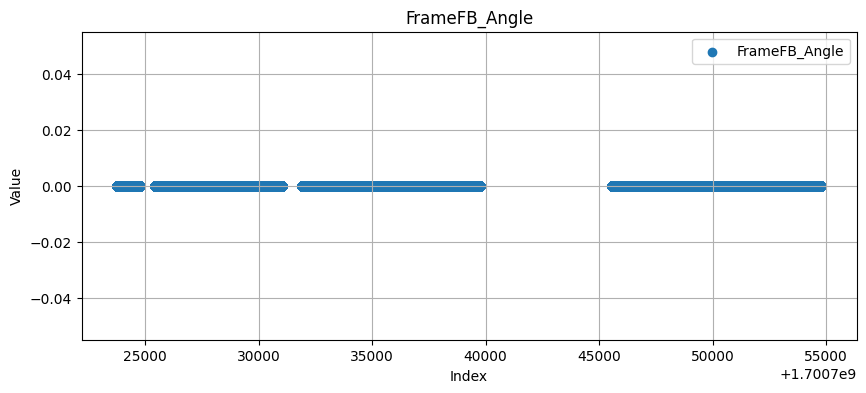

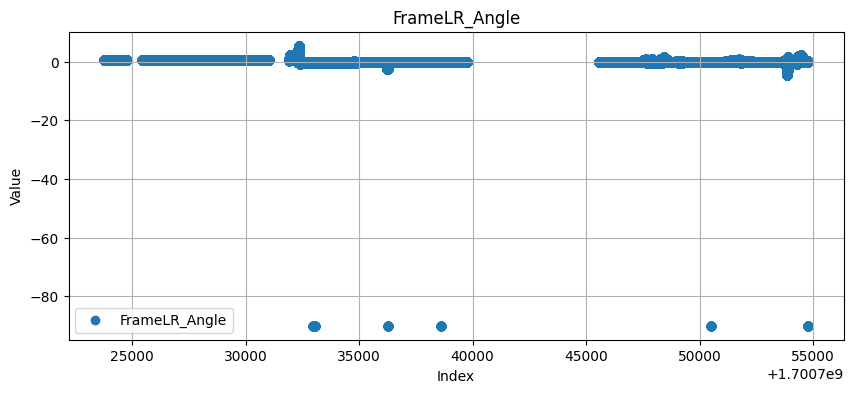

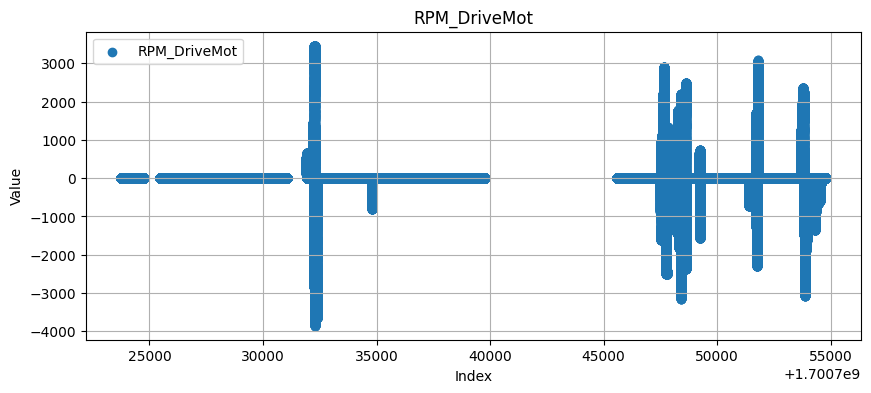

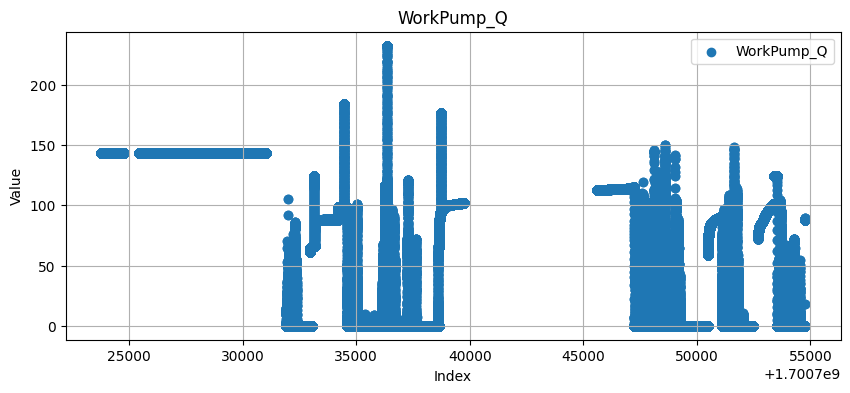

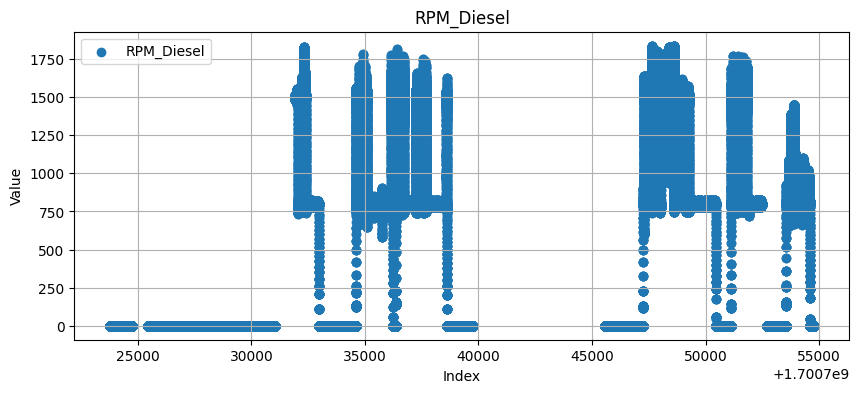

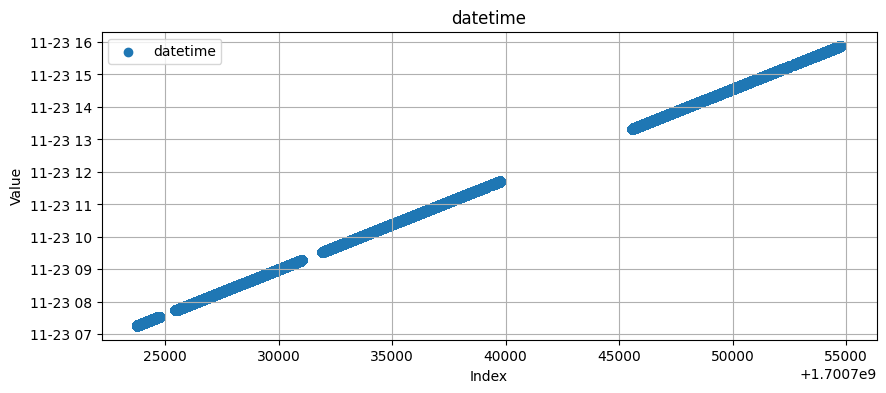

In [15]:
for column in df.columns:
    if df[column].isna().all():
        print(f"Skipping {column}")
        continue

    plt.figure(figsize=(10, 4))
    plt.scatter(df["timestamp"], df[column], label=column)
    plt.title(column)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()

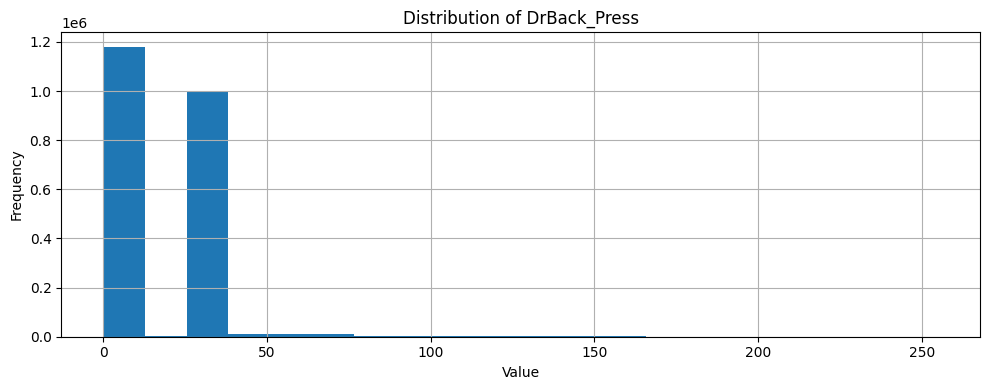

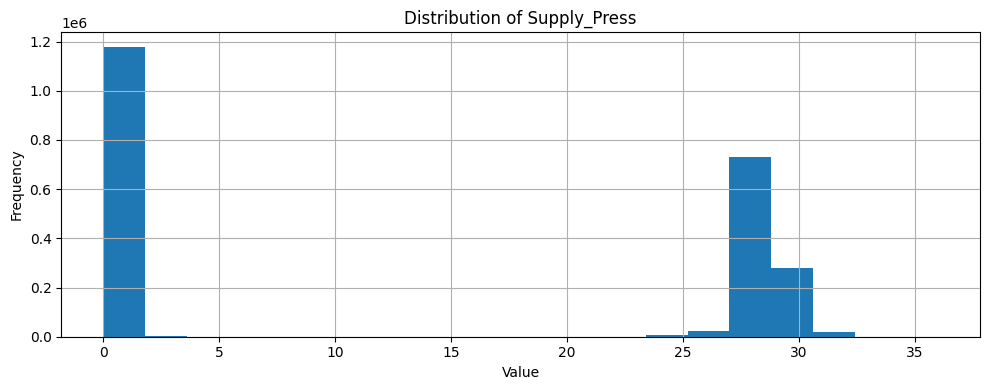

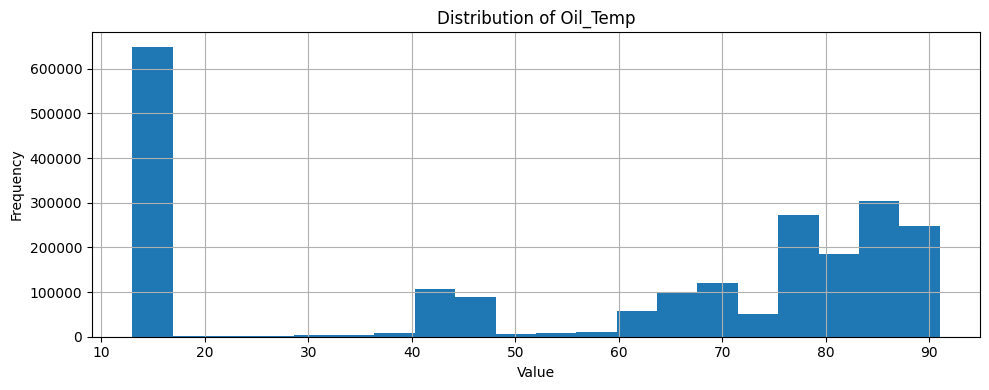

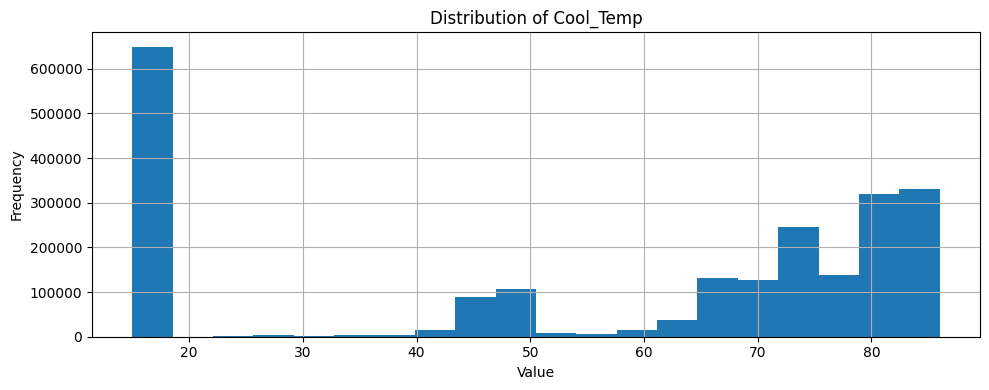

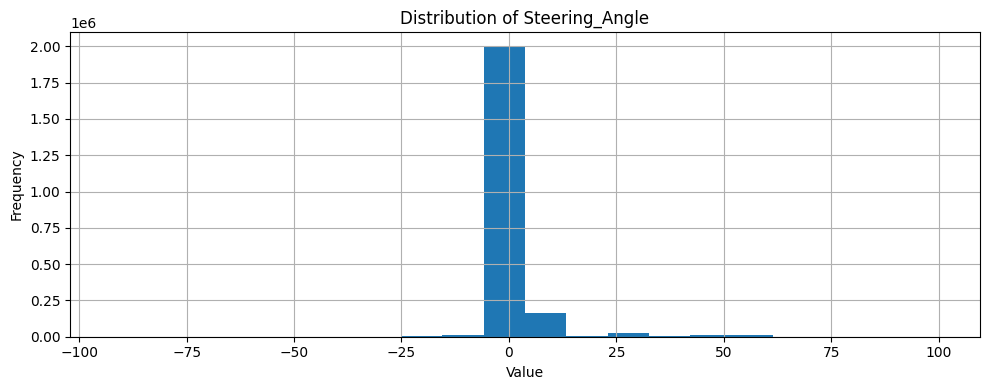

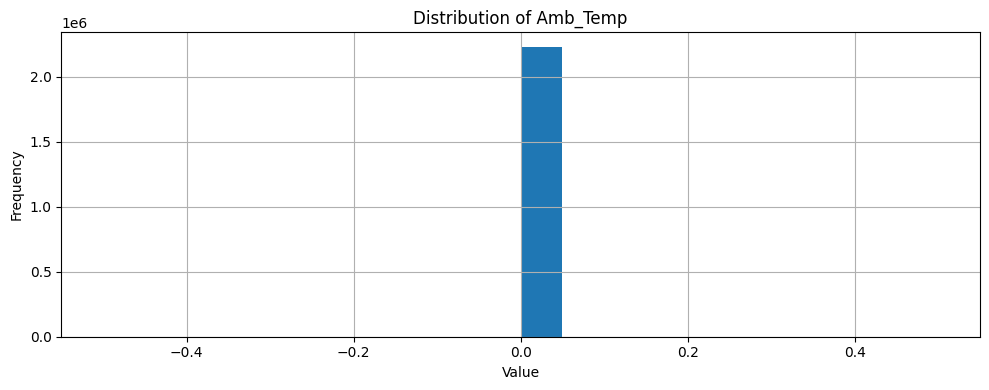

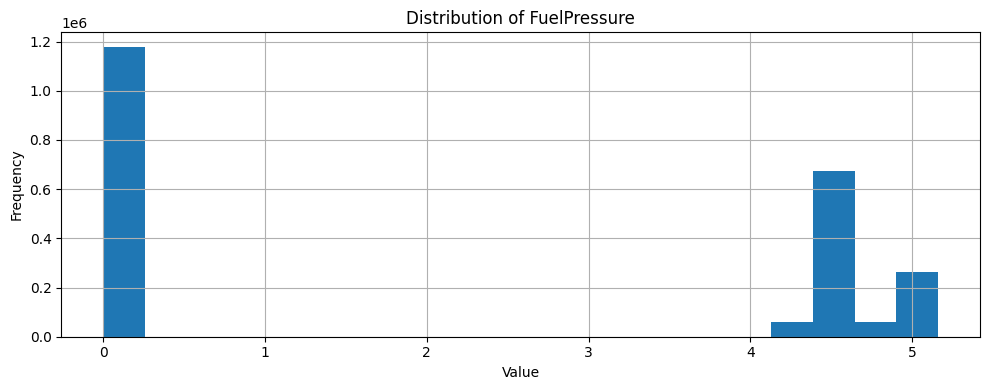

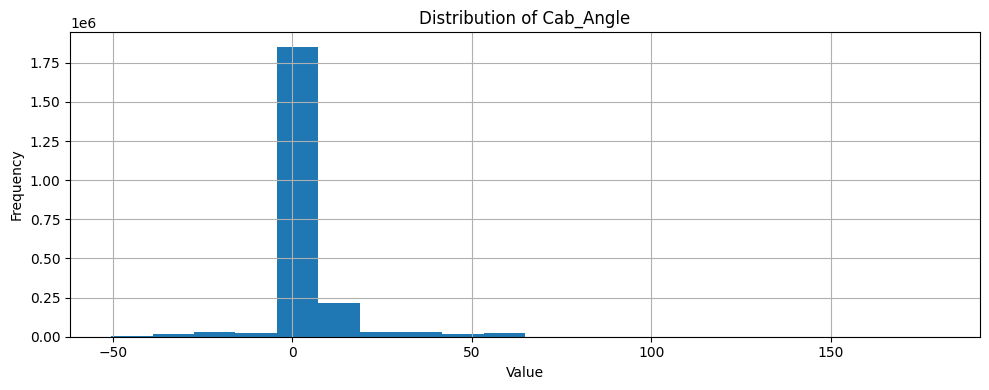

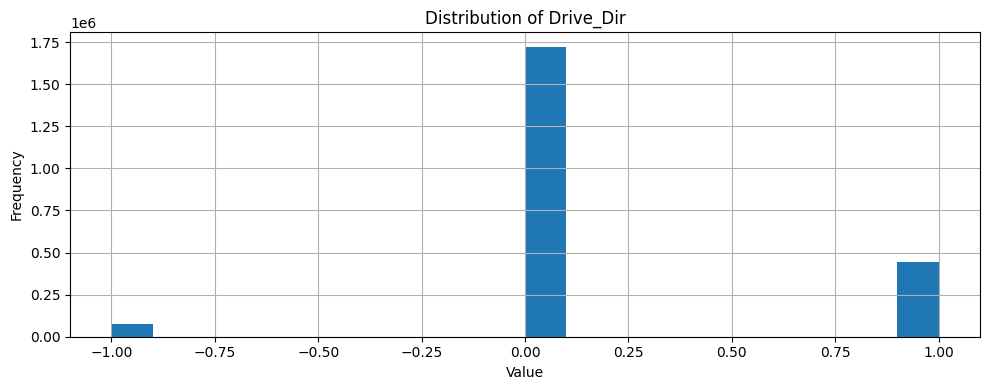

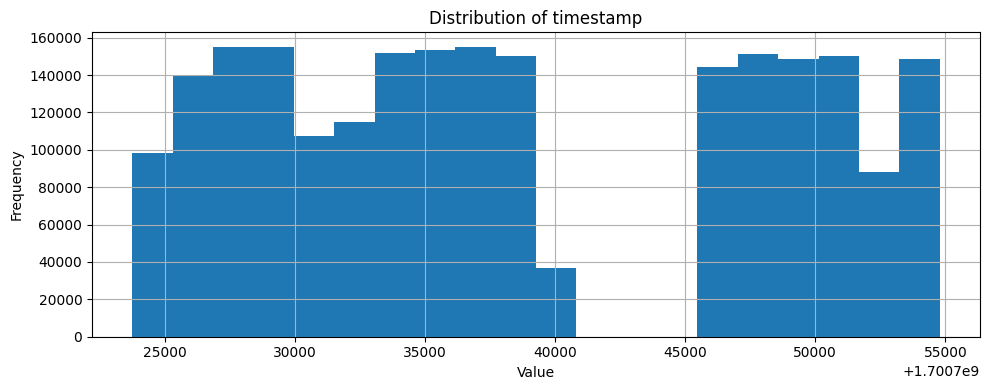

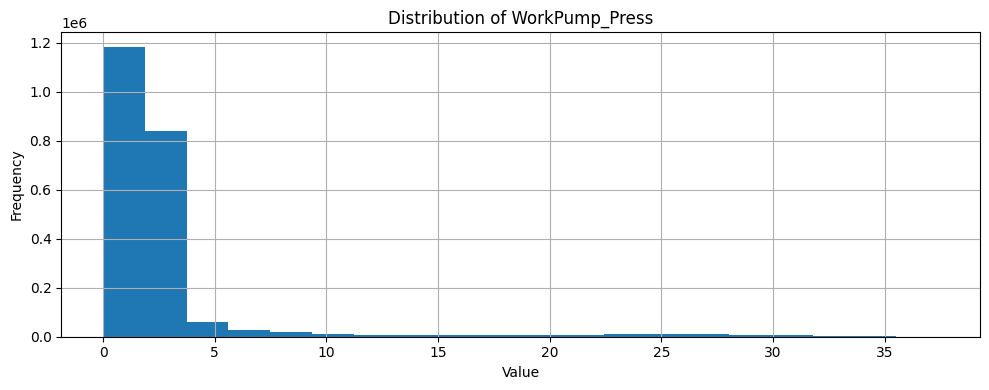

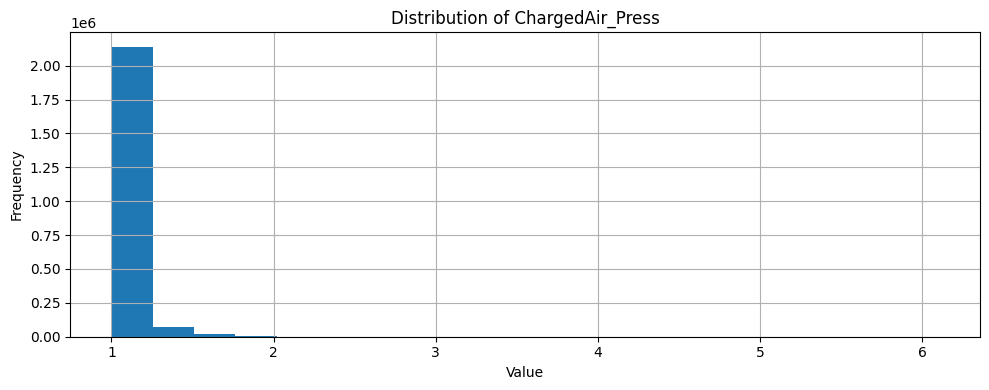

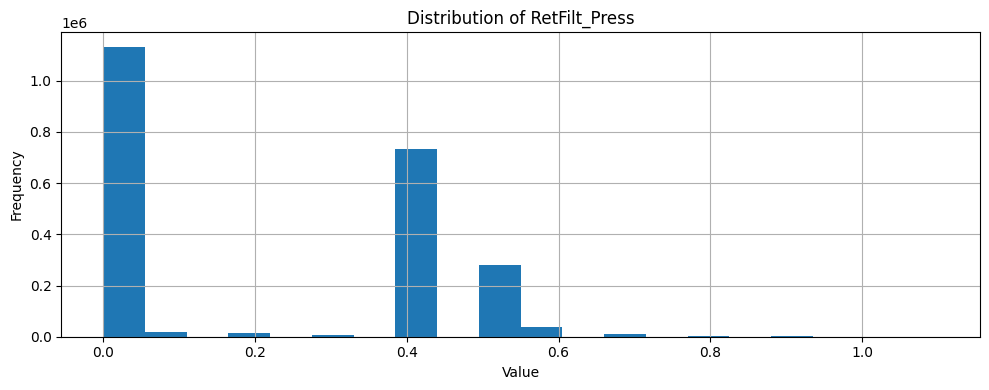

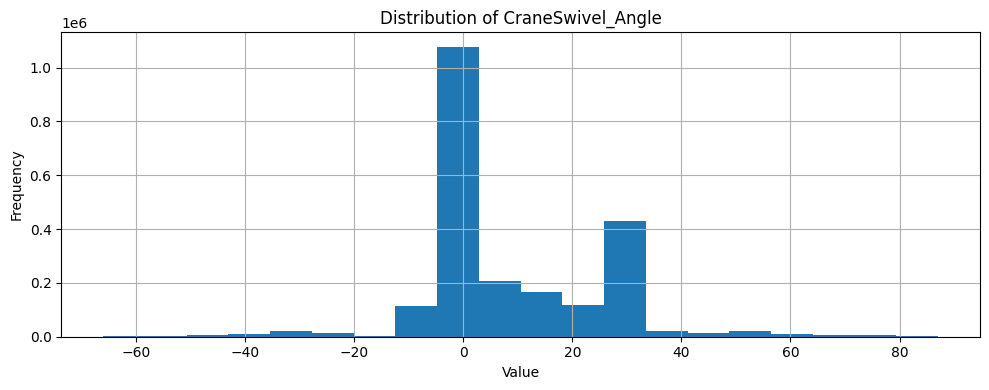

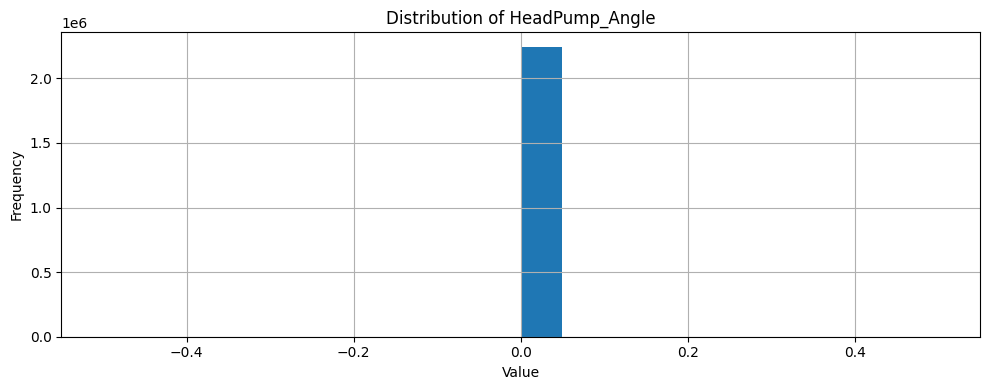

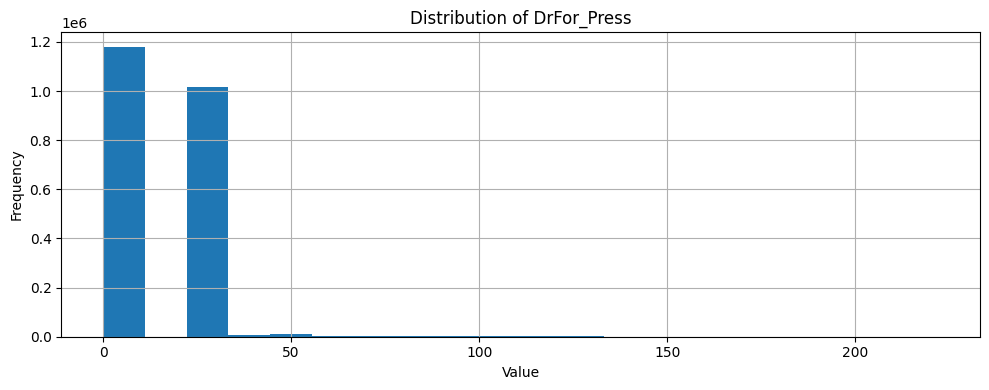

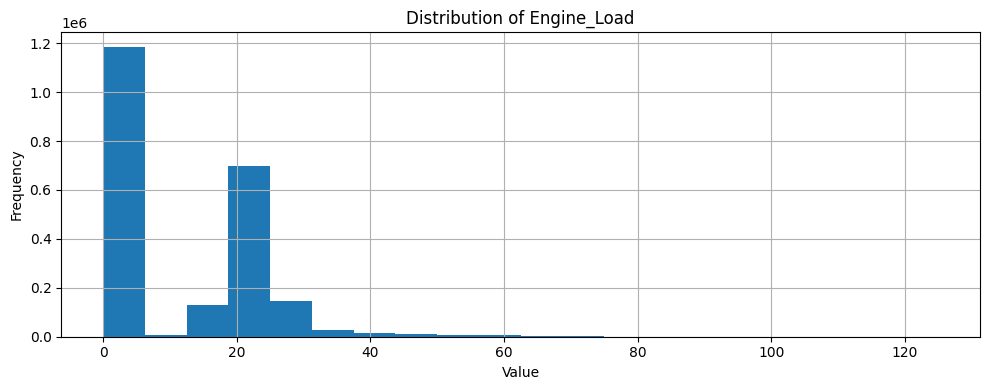

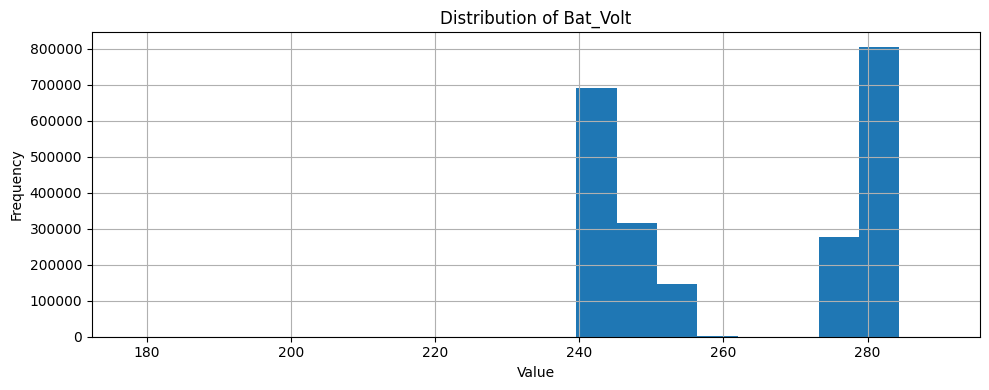

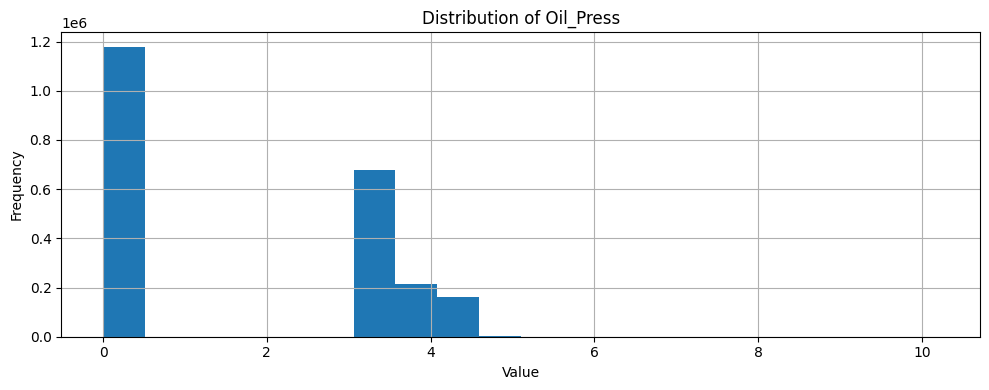

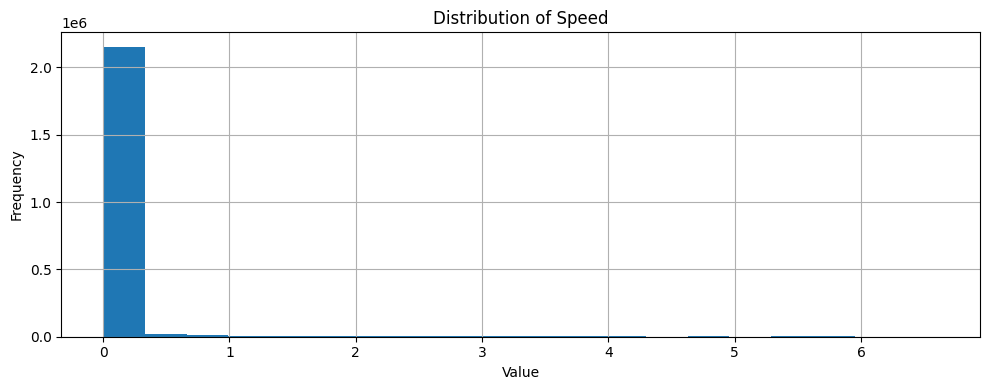

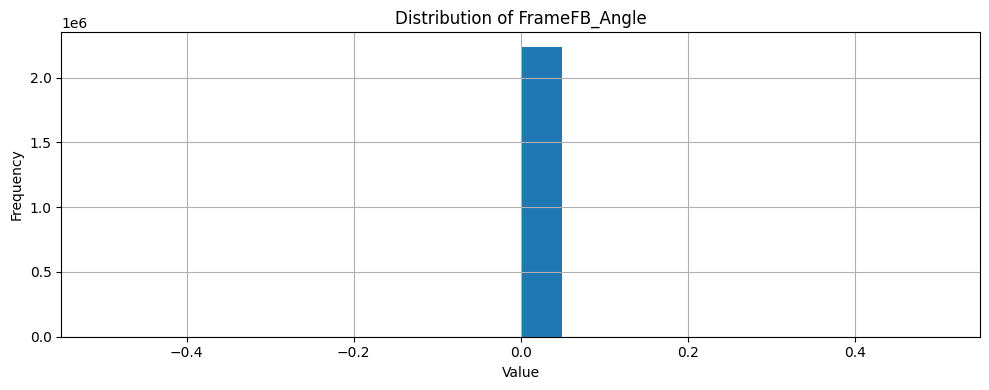

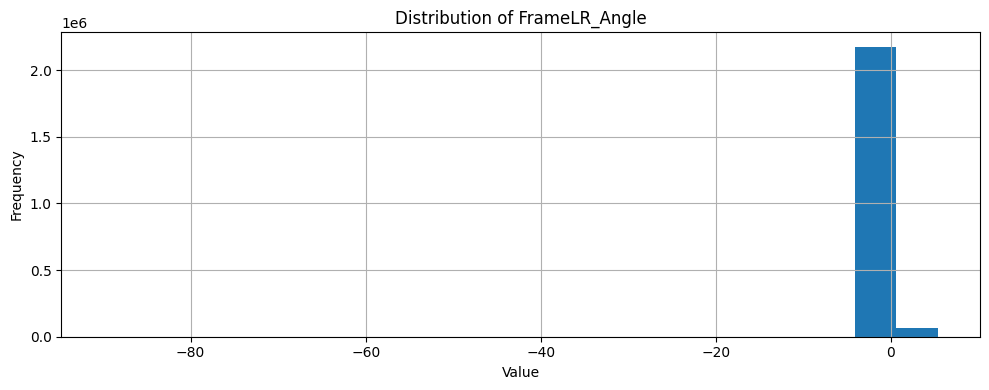

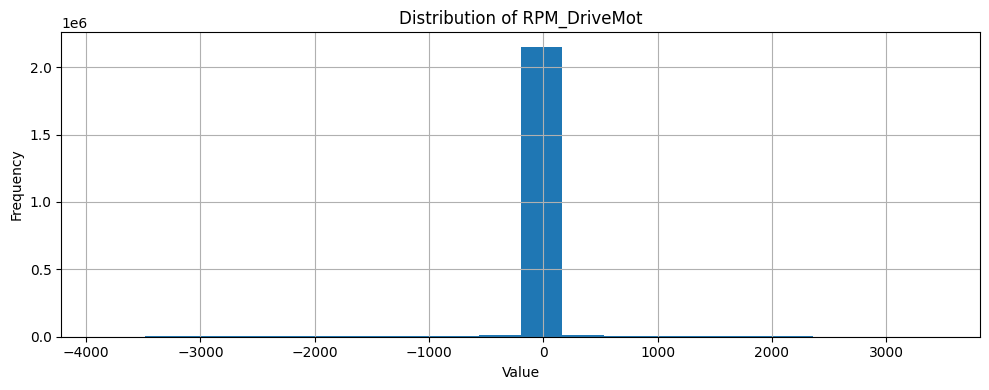

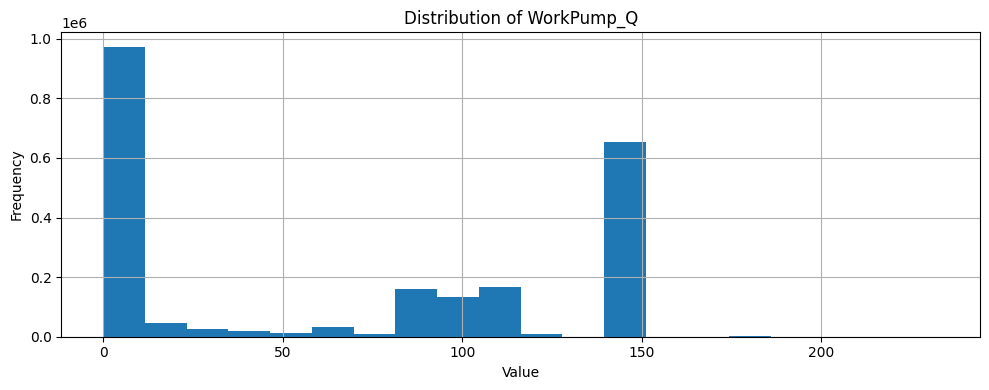

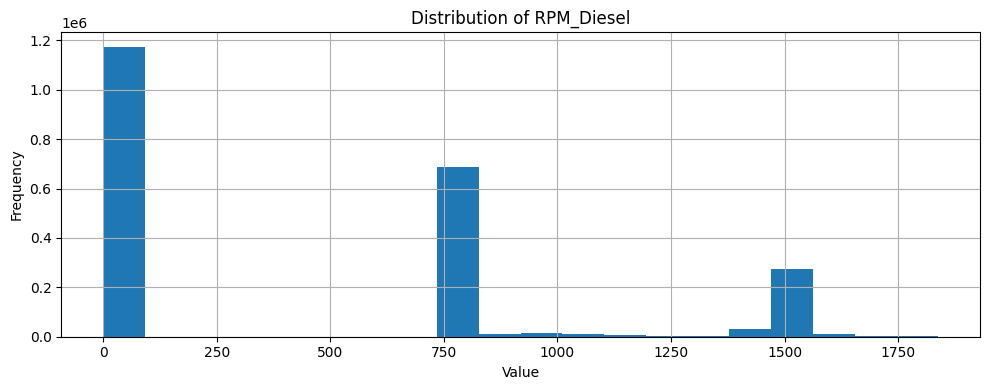

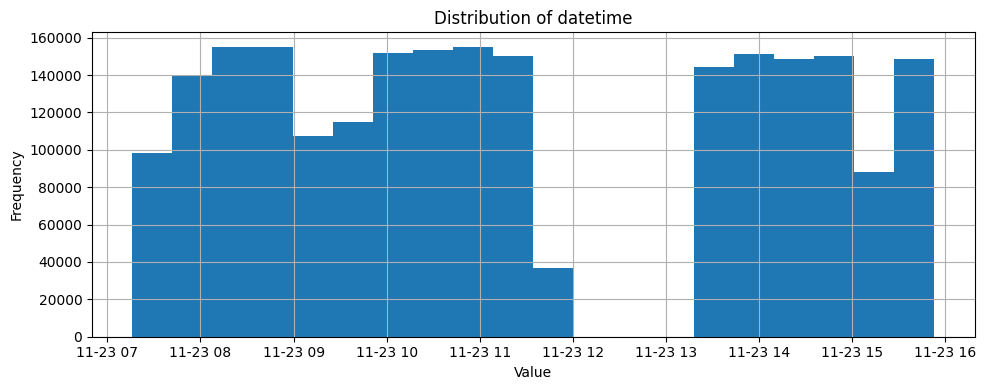

In [14]:
for column in df.columns:
    # Skip plotting if the entire column is NaN
    if df[column].isna().all():
        continue

    plt.figure(figsize=(10, 4))
    df[column].hist(bins=20)  # Adjust the number of bins as needed
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()